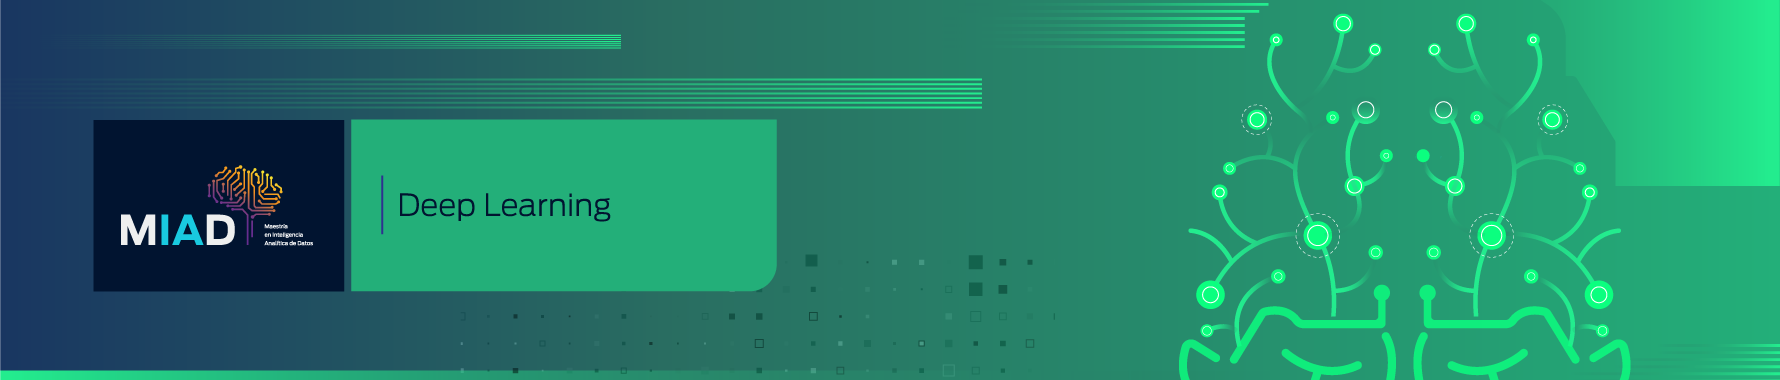

# Estrategias de implementación

## Redes neuronales usando Keras: Implementación en contexto real usando Keras

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Estimación de red neuronal con múltiples capas" se propuso una implementación manual de redes neuronales usando librerías básicas de python como lo son *pandas* y *numpy*. *Google* desarrolló un *API* para el aprendizaje automático cuyo nombre es *"Keras"*, esta es escrita en *python* y es utilizada para hacer implementaciones de redes neuronales simples.

Así, en este *notebook* se pretende evaluar el uso de *keras* al aplicar una red neuronal en un contexto real. 

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [30 puntos]

Estimación de un modelo utilizando redes neuronales: Se estima el modelo usando una red neuronal, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado [30 puntos]

Elección del mejor modelo: Se elige la mejor combinación de hiperparámetros de acuerdo a los resultados obtenidos y justifica adecuadamente la selección. [40 puntos]


#### Problema

Un *manager* de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Tengan en cuenta que, para resolver los puntos de esta actividad, únicamente deben considerar las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### Librerías a importar

In [1]:
import numpy as np
import pandas as pd
from math import exp

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn import metrics

from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE

2025-04-18 08:01:56.900321: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-18 08:01:56.907756: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 08:01:56.960385: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 08:01:57.005890: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744981317.045645    8611 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744981317.05

### Cargar Datos

In [2]:
# Importar datos .CSV
df = pd.read_csv("BankChurners.csv")

# vistar previa de los datos
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### 1. Análisis preliminar de variables [30 puntos]

Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

#### Revisar Datos y seperar variable objetivo

In [3]:
# Tamaño del data set
print("Tamaño del data set: \n", df.shape, "\n")

# Tipos de datos en el data set
print("Tipos de datos: \n", df.dtypes.value_counts())

Tamaño del data set: 
 (10127, 23) 

Tipos de datos: 
 int64      10
float64     7
object      6
Name: count, dtype: int64


In [4]:
# revisar variable objetivo
y = df["Attrition_Flag"]
y.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [5]:
# revisar variables predictoras
x = df.drop( columns="Attrition_Flag")
x.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### Limpiar datos

In [6]:
# Se realiza ajuste sobre el nombre de columnas de x, debido a que son muy largos
x.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'NBC_AF_CC_C12M_DC_EL_MI12M_1'}, inplace=True)
x.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'NBC_AF_CC_C12M_DC_EL_MI12M_2'}, inplace=True)

In [7]:
# Tengan en cuenta que, para resolver los puntos de esta actividad, únicamente deben considerar las variables continuas (se deben eliminar las variables categóricas) 
for columna in x:
    if x[columna].dtype == "object":
        x.drop(columns=columna, inplace=True)

# Ademas eliminamos el CLIENTNUM ya que representa el id unico del cliente y no se requiere para el modelo
x.drop(columns="CLIENTNUM", inplace=True)

x.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NBC_AF_CC_C12M_DC_EL_MI12M_1,NBC_AF_CC_C12M_DC_EL_MI12M_2
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
# deberán eliminar las observaciones con datos faltantes.
x = x.dropna()
y = y.loc[x.index]

print("Dimension de y: \n", y.shape, "\n")
print("Dimension de x: \n", x.shape)

Dimension de y: 
 (10127,) 

Dimension de x: 
 (10127, 16)


In [9]:
# Transformar la variable objetivo a binario
# Existing Customer    1
# Attrited Customer    0
encoder = LabelEncoder()
y = encoder.fit_transform(y)

y

array([1, 1, 1, ..., 0, 0, 0])

#### Analisis preliminar

In [10]:
# Estadisticos descriptivos de variables predictoras
x.describe().round(2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NBC_AF_CC_C12M_DC_EL_MI12M_1,NBC_AF_CC_C12M_DC_EL_MI12M_2
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27,0.16,0.84
std,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28,0.37,0.37
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02,0.00,1.00
50%,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18,0.00,1.00
75%,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50,0.00,1.00
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00,1.00,1.00


Al analizar los datos estadísticos de los clientes, la edad media fue de 46,3 años con una desviación estándar de 8 años, lo que indica una variabilidad moderada. La mayoría de los clientes tienen entre 41 y 52 años, con edades que oscilan entre los 26 y los 73 años. Esto indica que el banco atiende principalmente a adultos, la mayoría de los cuales están en edad de trabajar.
Respecto al número de dependientes, los clientes tenían un promedio de 2,3 dependientes, y aunque había alguna variación, la mayoría tenía entre 1 y 3 dependientes.

Respecto al tiempo que llevan siendo clientes del banco, el promedio es de casi 3 años (36 meses), con diferencias notables entre quienes apenas inician su relación con la entidad y quienes llevan más tiempo, lo que refleja una mezcla de clientes nuevos y de larga trayectoria.

Cuando se examinan las variables financieras, se nota una mayor diversidad. Por ejemplo, el límite de crédito promedio es de 8.631, pero con una gran dispersión (la desviación estándar también es alta: 9.088). Hay clientes con límites que llegan hasta los 34.516, lo que triplica el valor del tercer cuartil, lo cual indica que algunos perfiles tienen acceso a montos significativamente mayores.

Por otro lado, el saldo revolvente promedio es de 1.162, mientras que el monto promedio disponible para gastar es de 7.469, lo que sugiere que la mayoría de los clientes aún tienen crédito disponible. Sin embargo, algunos usuarios están al límite, como lo refleja la tasa de utilización promedio de 0.27 (es decir, utilizan el 27% del crédito disponible), con algunos casos llegando al 100%, lo cual podría ser una señal de alerta en términos de riesgo crediticio.

Finalmente, al observar el comportamiento de uso, en promedio un cliente realiza 65 transacciones con un valor total cercano a los 4.404. Sin embargo, hay quienes realizan hasta 139 transacciones por más de 18.000, lo que evidencia la existencia de patrones de gasto muy variados entre los clientes.
Variables como el cambio en el monto de gasto o en el número de transacciones entre dos trimestres (Total_Amt_Chng_Q4_Q1 y Total_Ct_Chng_Q4_Q1) tienen valores promedio cercanos a 0.7, pero en algunos casos extremos llegan hasta 3.4 o 3.71. Estos cambios abruptos podrían ser señales importantes para identificar posibles riesgos de abandono o cambios en el comportamiento del cliente.

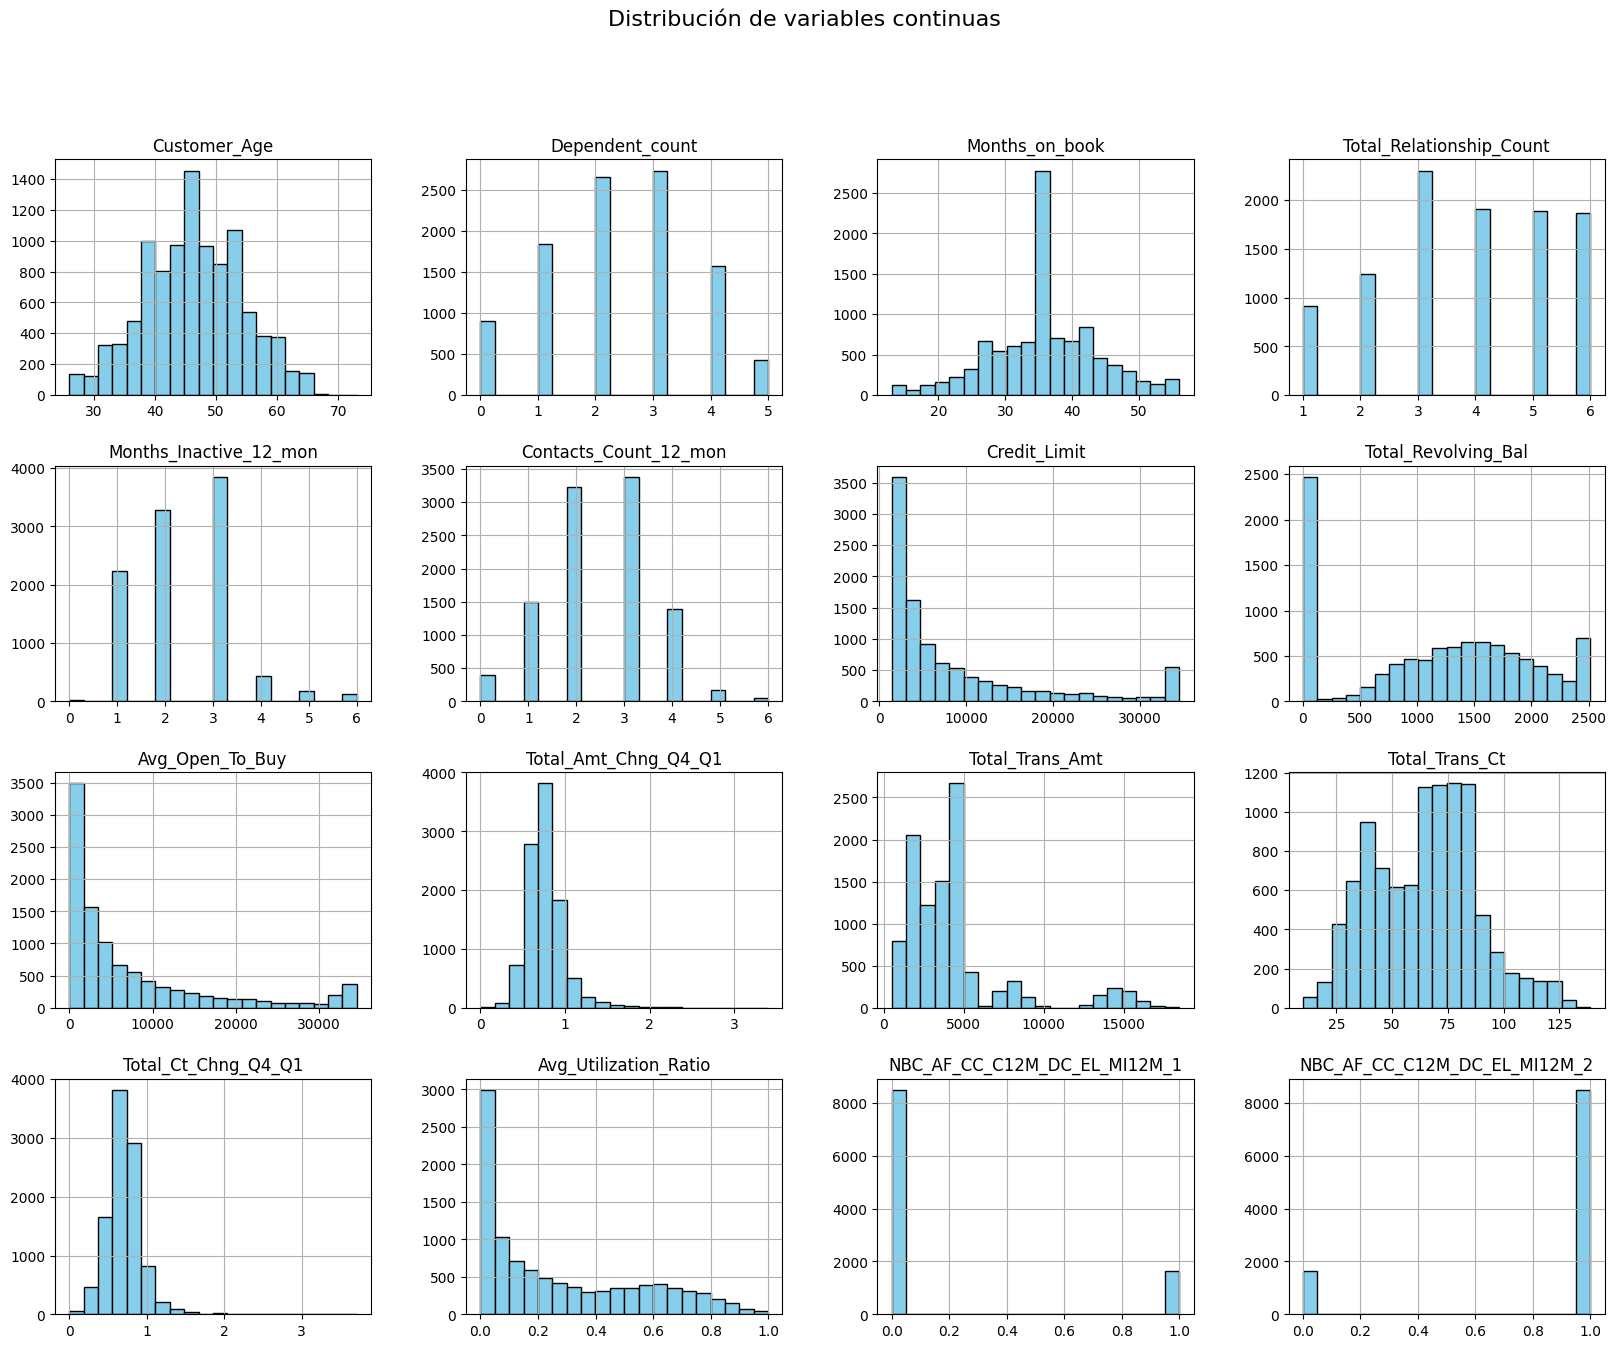

In [11]:
# Histogramas de las variables continuas
x.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables continuas", fontsize=16)
plt.show()

Durante la primera etapa del análisis de datos, se utilizaron histogramas para entender cómo se distribuyen las variables numéricas dentro del conjunto de datos. Para facilitar este análisis, primero se eliminaron las variables categóricas y también aquellas observaciones que tenían valores faltantes. Así, se trabajó únicamente con información numérica completa.

Al visualizar estas distribuciones, se encontró que variables como Customer_Age (edad del cliente), Months_on_book (tiempo con el banco) y Total_Trans_Ct (cantidad total de transacciones) tienen una forma simétrica, muy cercana a lo que se conoce como una distribución normal. Esto es una buena noticia, ya que significa que los datos están bien repartidos alrededor del promedio, lo cual suele ser favorable para los modelos predictivos, especialmente para las redes neuronales, que funcionan mejor cuando los datos de entrada son estables y balanceados.

En contraste, otras variables mostraron un comportamiento diferente: presentan una asimetría positiva, es decir, la mayoría de los valores están concentrados en niveles bajos, pero hay unos pocos casos con valores muy altos que se alejan bastante del resto. Entre estas variables están Credit_Limit, Avg_Open_To_Buy, Total_Revolving_Bal y Total_Trans_Amt. Esto nos dice que muchos clientes tienen límites de crédito bajos o hacen pocas transacciones, pero hay unos cuantos con montos bastante elevados. Estas diferencias extremas pueden generar dificultades para el modelo, en especial si no se normalizan o transforman adecuadamente, ya que podrían influir negativamente durante el entrenamiento. En estos casos, aplicar una transformación logarítmica podría ayudar a manejar mejor la variabilidad y a lograr una interpretación más clara.

También se detectaron algunas variables numéricas que, aunque están registradas como datos continuos, en realidad representan conteos o categorías discretas. Por ejemplo, Dependent_count (cantidad de dependientes), Total_Relationship_Count (número total de relaciones con el banco), Contacts_Count_12_mon (contactos en los últimos 12 meses) y Months_Inactive_12_mon (meses de inactividad). Estas variables tienden a agruparse en ciertos valores específicos, lo que indica que muchos clientes comparten las mismas características. Aunque parezcan variables continuas, su comportamiento discreto es importante al momento de interpretar los resultados de un modelo.

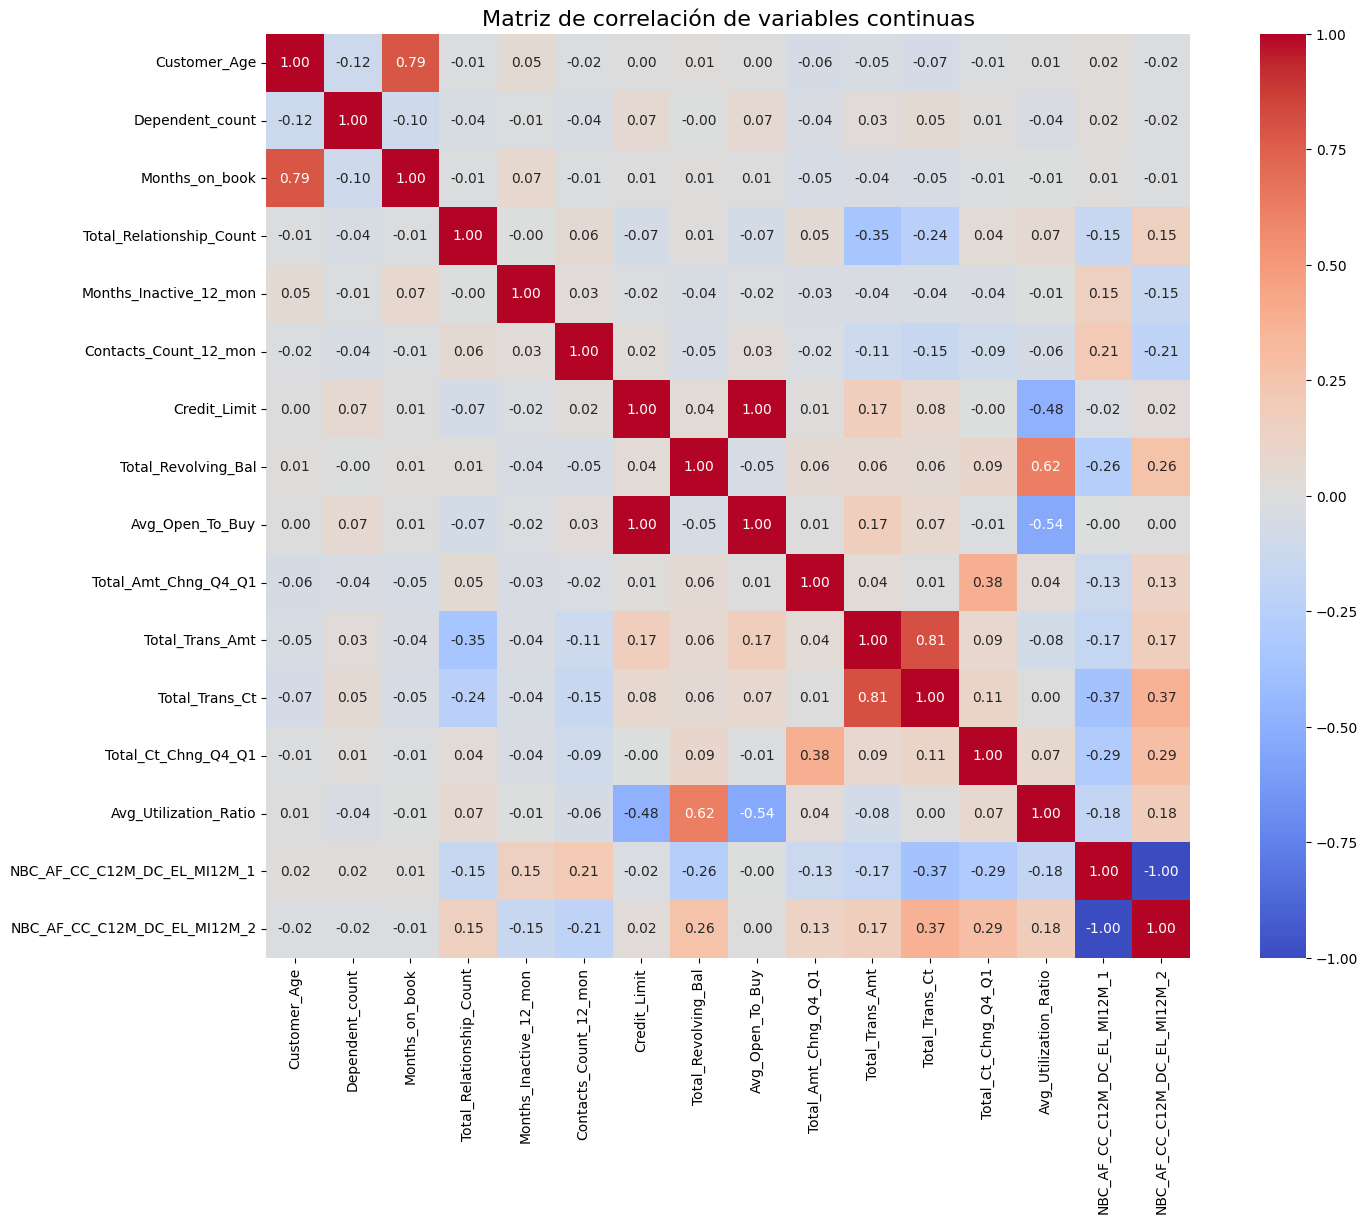

In [12]:
# Correlograma (matriz de correlación)
plt.figure(figsize=(18, 12))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación de variables continuas", fontsize=16)
plt.show()

La matriz de correlación de las variables numéricas nos ayuda a entender qué tan relacionadas están entre sí algunas características del cliente que podrían influir en el modelo. Al revisar esta matriz en forma gráfica, se destaca una fuerte relación positiva entre Months_on_book (tiempo con el banco) y Customer_Age (edad del cliente), con un valor de 0.79. Esto tiene sentido: normalmente, quienes llevan más tiempo con el banco suelen ser personas de mayor edad. Dado que ambas variables están tan relacionadas, podríamos considerar usar solo una de ellas en algunos modelos, para evitar que aporten información repetida o generen problemas como la multicolinealidad.

También se observó una correlación altísima entre Credit_Limit (límite de crédito) y Avg_Open_To_Buy (promedio disponible para gastar), con un valor de 0.98. En términos simples, cuanto mayor es el límite de crédito que tiene una persona, más puede gastar. Esta relación directa puede tener un impacto importante en el análisis del comportamiento financiero del cliente.

Hay otras correlaciones que, si bien no son tan fuertes, también llaman la atención. Por ejemplo, Total_Trans_Ct (número total de transacciones) y Total_Trans_Amt (monto total de las transacciones) tienen una relación de 0.81, lo cual es lógico: quienes hacen más compras, generalmente terminan gastando más. También se nota que Total_Ct_Chng_Q4_Q1 (cambio en la cantidad de transacciones entre dos trimestres) se relaciona positivamente con Total_Trans_Ct, lo que sugiere cierta estabilidad en los hábitos de compra de algunos clientes a lo largo del tiempo.

Otra observación importante es que Avg_Utilization_Ratio (proporción del crédito que se utiliza) tiene una correlación negativa con Credit_Limit y Avg_Open_To_Buy. Es decir, quienes tienen un límite de crédito más alto suelen usar una menor proporción de ese crédito. Esto puede ser una señal de que son clientes más solventes o que tienden a endeudarse menos.

/tmp/ipykernel_8611/3773259607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


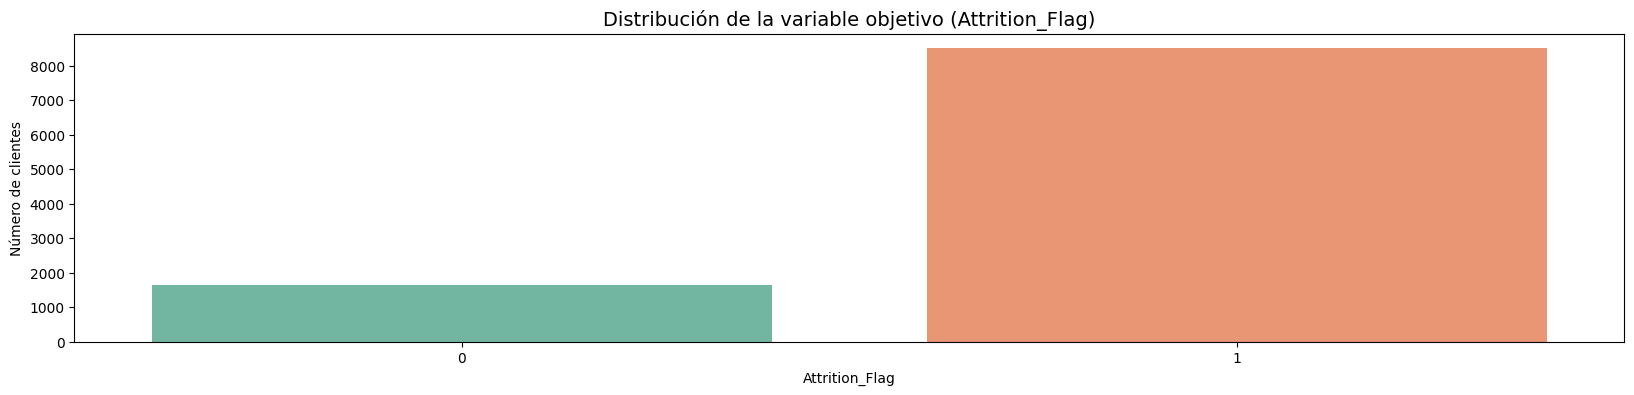

In [13]:
# Distribución de la variable objetivo
plt.figure(figsize=(20, 4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribución de la variable objetivo (Attrition_Flag)", fontsize=14)
plt.xlabel("Attrition_Flag")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)
plt.show()

En el análisis exploratorio se evidenció que la mayoría de los clientes del banco se encuentran en una edad media de 46 años, con una concentración entre los 41 y 52 años, lo que indica una base de clientes principalmente adultos. La mayoría cuenta con entre uno y tres dependientes, y llevan en promedio cerca de tres años vinculados al banco, aunque con una mezcla clara entre usuarios nuevos y antiguos.

En cuanto a variables financieras, se observó una amplia dispersión en los límites de crédito, con promedios alrededor de los 8.600 pero valores máximos que superan los 34.000. También se identificó que aunque el uso del crédito disponible es en promedio del 27%, existen casos en los que llega al 100%, lo cual podría implicar cierto nivel de riesgo financiero.

El comportamiento transaccional mostró que, en promedio, los clientes realizan 65 transacciones por un total cercano a los 4.400, aunque hay usuarios con niveles de actividad mucho más altos. Se evidenciaron cambios notables entre trimestres en el número y monto de las transacciones, lo que puede ser útil para identificar variaciones significativas en el comportamiento del cliente.

Durante la visualización de los datos numéricos, se encontró que algunas variables presentan distribuciones cercanas a la normalidad, como la edad del cliente, el tiempo con el banco y el número de transacciones, lo que favorece su uso en modelos predictivos. Sin embargo, otras variables mostraron distribuciones asimétricas, con valores extremos alejados del promedio. Este comportamiento podría requerir transformaciones, como la logarítmica, para mejorar el rendimiento en modelos analíticos.

Finalmente, se identificaron variables registradas como continuas pero que en realidad representan conteos discretos, lo cual será importante tener en cuenta en el procesamiento posterior.

### 2. Estimación del modelo usando una red neuronal con keras [30 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test con hiperparámetros de su selección.

#### Modelo 1 (Cristian)

In [14]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
# Se separan los datos en test y train
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Se realiza el escalamiento de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Transformar a formato NumPy
X_train = np.array(X_train, dtype=np.float32)
X_valid = np.array(X_valid, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

y_train = np.array(y_train, dtype=np.float32)
y_valid = np.array(y_valid, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [15]:
# Cracion de la red 
model = keras.models.Sequential()

model.add(keras.layers.Dense(300, activation="relu", input_shape=(16,))) 
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

/home/maro/Documents/uniAndes/deepLearning/vDeepL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1744981319.538028    8611 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1744981319.540260    8611 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [16]:
# Generamos un resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,601 (490.63 KB)

 Trainable params: 125,601 (490.63 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Manejar el desbalance
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {i : weights[i] for i in range(len(weights))}

In [18]:
# Compilacion del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), class_weight=class_weights)

Epoch 1/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9800 - loss: 0.0844 - val_accuracy: 0.8399 - val_loss: 3409.7241
Epoch 2/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.6977e-05 - val_accuracy: 0.8399 - val_loss: 3498.8533
Epoch 3/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.3545e-05 - val_accuracy: 0.8399 - val_loss: 3518.0247
Epoch 4/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 1.0000 - loss: 8.0600e-06 - val_accuracy: 0.8399 - val_loss: 3569.2981
Epoch 5/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 1.0000 - loss: 5.3515e-06 - val_accuracy: 0.8399 - val_loss: 3621.5188
Epoch 6/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.6415e-06 - val_accuracy: 0.8399 - val_loss: 3658.1328
Epoch 7/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 1.0000 - loss: 2.5962e-06 - val_accuracy: 0.8399 - val_loss: 3699.0071
Epoch 8/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step

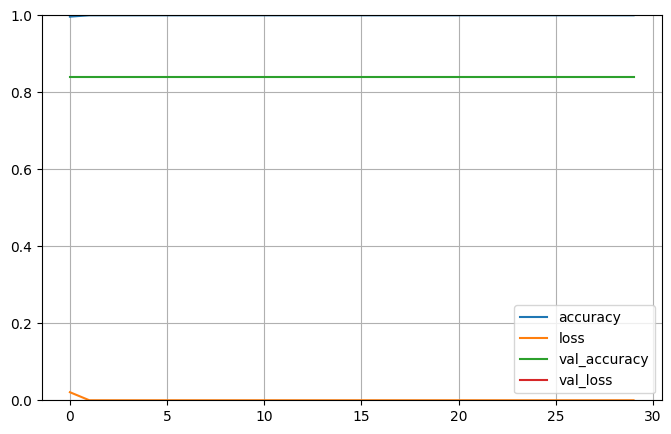

In [20]:
# graficar el entrenamiento del modelo
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 1.0000 - loss: 7.6753e-08


In [22]:
y_predict = model.predict(X_test)
y_predict

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step


array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [1.7500761e-09],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

#### Modelo 2 (Jose)

In [23]:
# Eliminar variables altamente correlacionadas
x = x.drop(["Customer_Age", "Credit_Limit", "Avg_Open_To_Buy"], axis =1)

In [24]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
# Se separan los datos en test y train
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, stratify=y_train_full, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Se realiza el escalamiento de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Transformar a formato NumPy
X_train_array = np.array(X_train_scaled, dtype=np.float32)
X_valid_array = np.array(X_valid_scaled, dtype=np.float32)
X_test_array = np.array(X_test_scaled, dtype=np.float32)

y_train_array = np.array(y_train_smote, dtype=np.float32)
y_valid_array = np.array(y_valid, dtype=np.float32)
y_test_array = np.array(y_test, dtype=np.float32)

In [25]:
# Cracion de la red 
model = keras.models.Sequential()

model.add(keras.layers.Dense(12, activation="relu", input_shape=(13,)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(6, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation="sigmoid"))

/home/maro/Documents/uniAndes/deepLearning/vDeepL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Generamos un resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 12)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 253 (1012.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compilacion del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Entrenamiento del modelo
history = model.fit(X_train_array, y_train_array, epochs=50, validation_data=(X_valid_array, y_valid_array))

Epoch 1/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.6639 - loss: 0.5939 - val_accuracy: 0.8797 - val_loss: 0.2869
Epoch 2/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9707 - loss: 0.1702 - val_accuracy: 0.9463 - val_loss: 0.1191
Epoch 3/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.9942 - loss: 0.0418 - val_accuracy: 0.9759 - val_loss: 0.0625
Epoch 4/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.9973 - loss: 0.0221 - val_accuracy: 0.9846 - val_loss: 0.0407
Epoch 5/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9971 - loss: 0.0178 - val_accuracy: 0.9901 - val_loss: 0.0265
Epoch 6/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.9985 - loss: 0.0143 - val_accuracy: 0.9932 - val_loss: 0.0185
Epoch 7/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.9975 - loss: 0.0139 - val_accuracy: 0.9932 - val_loss: 0.0177
Epoch 8/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.9979 - loss: 0.0133 - 

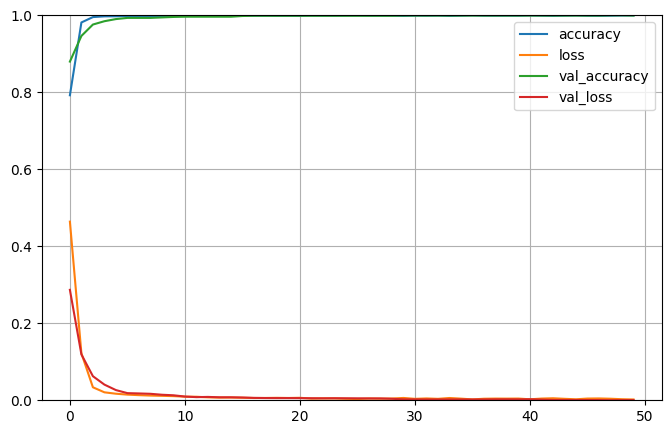

In [29]:
# graficar el entrenamiento del modelo
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [30]:
test_loss, test_acc = model.evaluate(X_test_array, y_test_array)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.9999 - loss: 9.5609e-05


In [31]:
y_predict = model.predict(X_test)
y_predict

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step


array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

#### Modelo 3 - Early stopping (Cesar)

In [32]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
# Se separan los datos en test y train
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Se realiza el escalamiento de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Transformar a formato NumPy
X_train = np.array(X_train, dtype=np.float32)
X_valid = np.array(X_valid, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

y_train = np.array(y_train, dtype=np.float32)
y_valid = np.array(y_valid, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [33]:
#Creación de la red

model = keras.models.Sequential()
model.add(keras.layers.Dense(32, input_shape=(13,), activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) 

/home/maro/Documents/uniAndes/deepLearning/vDeepL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Generamos un resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 12)             │           396 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 957 (3.74 KB)

 Trainable params: 957 (3.74 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#Compilación del modelo

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:

# Definir EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [37]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_split=0.2 ,epochs=300, batch_size=10, callbacks=[early_stop], verbose=1)

Epoch 1/300
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.9357 - loss: 0.2479 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 2/300
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 4.3618e-04
Epoch 3/300
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 1.0000 - loss: 3.4968e-04 - val_accuracy: 1.0000 - val_loss: 1.7908e-04
Epoch 4/300
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 1.0000 - loss: 1.5290e-04 - val_accuracy: 1.0000 - val_loss: 9.3882e-05
Epoch 5/300
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 1.0000 - loss: 7.7923e-05 - val_accuracy: 1.0000 - val_loss: 5.5390e-05
Epoch 6/300
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 1.0000 - loss: 4.7450e-05 - val_accuracy: 1.0000 - val_loss: 3.5385e-05
Epoch 7/300
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 1.0000 - loss: 3.2232e-05 - val_accuracy: 1.0000 - val_loss: 2.3707e-05
Epoch 8/300
456/456 ━━━━━━━━━━━━━━━━━━━

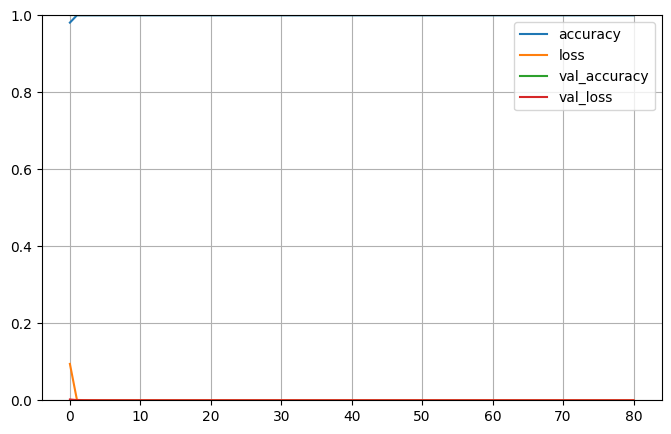

In [38]:
# graficar el entrenamiento del modelo
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 1.0000 - loss: 6.0989e-10


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Elección del mejor modelo [40 puntos]

Ahora construyan una función que reciba por parámetro una lista de número de capas a utilizar,  números de neuronas por capa, así como funciones de activación a utilizar.

Dicha función debe entrenar el modelo con los datos de entrenamiento, evaluar con los datos de prueba para cada una de las combinaciones de hiperparámetros y encontrar cuál es la mejor combinación de hiperprámetros.  

Una vez hecho este procedimiento respondan a la siguiente pregunta:
 
¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?

In [75]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
def transformar_Datos(x, y):
    X_train_full, X_test, y_train_full, y_test = train_test_split(x, y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

    # Se realiza el escalamiento de los datos
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Transformar a formato NumPy
    X_train = np.array(X_train, dtype=np.float32)
    X_valid = np.array(X_valid, dtype=np.float32)
    X_test = np.array(X_test, dtype=np.float32)

    y_train = np.array(y_train, dtype=np.float32)
    y_valid = np.array(y_valid, dtype=np.float32)
    y_test = np.array(y_test, dtype=np.float32) 

    return [X_train, X_valid, X_test, y_train, y_valid, y_test]


def eleccionModelo (lis_Num_Capas, lis_Num_neuronas, lis_fun_activacion, x, y ):
    list_res = []

    X_train, X_valid, X_test, y_train, y_valid, y_test  = transformar_Datos(x, y)

    for num_Capas in lis_Num_Capas:
        for num_Neuronas in lis_Num_neuronas:
            for fun_activa in lis_fun_activacion:
                model = keras.models.Sequential()
                model.add(keras.layers.Dense(num_Neuronas, activation=fun_activa, input_shape=(13,))) 
                
                for capa in range(0, num_Capas):
                    model.add(keras.layers.Dense(num_Neuronas, activation=fun_activa))

                model.add(keras.layers.Dense(1, activation="sigmoid"))

                # Compilar modelo
                model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])    
                
                # Entrenar modelo
                model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), verbose=0)

                # Evaluar modelo
                predicciones = model.predict(X_test, verbose=0)
                y_pred = [round(x[0]) for x in predicciones]

                fpr, tpr, thresholds = metrics.roc_curve(y_test, predicciones, pos_label=1)
                AUCRegLog=metrics.auc(fpr, tpr)

                # Imprimir métricas de desempeño
                res = {"accuracy": accuracy_score(y_true=y_test, y_pred=y_pred), 
                    "precision": precision_score(y_true=y_test, y_pred=y_pred),
                    # "matrizConfusion": confusion_matrix(y_true=y_test, y_pred=y_pred),
                    "AUC": AUCRegLog,
                    "num_Capas":num_Capas,           
                    "num_Neuronas":num_Neuronas,           
                    "fun_Activa":fun_activa,           
                    }
                
                list_res.append(res)
            
    return list_res

In [76]:
# Ejecutar funcion
lis_Num_Capas = [3, 4, 5]
lis_Num_neuronas = [100, 200, 300]
lis_fun_activacion = ['relu', 'selu', 'softplus']
ejecucion =  eleccionModelo(lis_Num_Capas, lis_Num_neuronas, lis_fun_activacion, x, y)
print(ejecucion)

/home/maro/Documents/uniAndes/deepLearning/vDeepL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/maro/Documents/uniAndes/deepLearning/vDeepL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/maro/Documents/uniAndes/deepLearning/vDeepL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as 

[{'accuracy': 1.0, 'precision': 1.0, 'AUC': np.float64(1.0), 'num_Capas': 3, 'num_Neuronas': 100, 'fun_Activa': 'relu'}, {'accuracy': 1.0, 'precision': 1.0, 'AUC': np.float64(1.0), 'num_Capas': 3, 'num_Neuronas': 100, 'fun_Activa': 'selu'}, {'accuracy': 1.0, 'precision': 1.0, 'AUC': np.float64(1.0), 'num_Capas': 3, 'num_Neuronas': 100, 'fun_Activa': 'softplus'}, {'accuracy': 1.0, 'precision': 1.0, 'AUC': np.float64(1.0), 'num_Capas': 3, 'num_Neuronas': 200, 'fun_Activa': 'relu'}, {'accuracy': 1.0, 'precision': 1.0, 'AUC': np.float64(1.0), 'num_Capas': 3, 'num_Neuronas': 200, 'fun_Activa': 'selu'}, {'accuracy': 1.0, 'precision': 1.0, 'AUC': np.float64(1.0), 'num_Capas': 3, 'num_Neuronas': 200, 'fun_Activa': 'softplus'}, {'accuracy': 1.0, 'precision': 1.0, 'AUC': np.float64(1.0), 'num_Capas': 3, 'num_Neuronas': 300, 'fun_Activa': 'relu'}, {'accuracy': 1.0, 'precision': 1.0, 'AUC': np.float64(1.0), 'num_Capas': 3, 'num_Neuronas': 300, 'fun_Activa': 'selu'}, {'accuracy': 1.0, 'precision': 

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)